In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvb3Jlbi93b3JrL25vdGVzL25vdGVzLXJsL3Bvc3RzL2NvdXJzZXJh'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/home/oren/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/tmp/ipykernel_935436/2990395684.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/lib/python3.10/importlib/_bootstrap.py": 1730924533.0, "/usr/lib/python3.10/importlib/_bootstrap_external.py": 1730924533.0, "/usr/lib/python3.10/codecs.py": 1730924533.0, "/usr/lib/python3.10/encodings/aliases.py": 1730924533.0, "/usr/lib/python3.10/encodings/__init__.py": 1730924533.0, "/usr/lib/python3.10/encodings/utf_8.py": 1730924533.0, "/usr/lib/python3.10/abc.py": 1730924533.0, "/usr/lib/python3.10/io.py": 1730924533.0, "/usr/lib/python3.10/stat.py": 1730924533.0, "/usr/lib/python3.10/_collections_abc.py": 1730924533.0, "/usr/lib/python3.10/genericpath.py": 1730924533.0, "/usr/lib/python3.10/posixpath.py": 1730924533.0, "/usr/lib/python3.10/os.py": 1730924533.0, "/usr/lib/python3.10/_sitebuiltins.py": 1730924533.0, "/home/oren/.local/lib/python3.10/site-packages/_distutils_hack/__init__.py": 1720016493.4517488, "/usr/lib/python3.10/types.py": 1730924533.0, "/usr/lib/python3.10/warnings.py": 1730924533.0, "/usr/lib/python3.10/importlib/__init__.py": 1730924533.0, "/usr/li

In [2]:
# Import required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
  
# Define Action class 
class Actions: 
  def __init__(self, m): 
    self.m = m 
    self.mean = 0
    self.N = 0
  
  # Choose a random action 
  def choose(self):  
    return np.random.randn() + self.m 
  
  # Update the action-value estimate 
  def update(self, x): 
    self.N += 1
    self.mean = (1 - 1.0 / self.N)*self.mean + 1.0 / self.N * x 
  
  
def run_experiment(m1, m2, m3, eps, N): 
      
  actions = [Actions(m1), Actions(m2), Actions(m3)] 
  
  data = np.empty(N) 
    
  for i in range(N): 
    # epsilon greedy 
    p = np.random.random() 
    if p < eps: 
      j = np.random.choice(3) 
    else: 
      j = np.argmax([a.mean for a in actions]) 
    x = actions[j].choose() 
    actions[j].update(x) 
  
    # for the plot 
    data[i] = x 
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1) 
  
  # plot moving average ctr 
  plt.plot(cumulative_average) 
  plt.plot(np.ones(N)*m1) 
  plt.plot(np.ones(N)*m2) 
  plt.plot(np.ones(N)*m3) 
  plt.xscale('log') 
  plt.show() 
  
  for a in actions: 
    print(a.mean) 
  
  return cumulative_average 

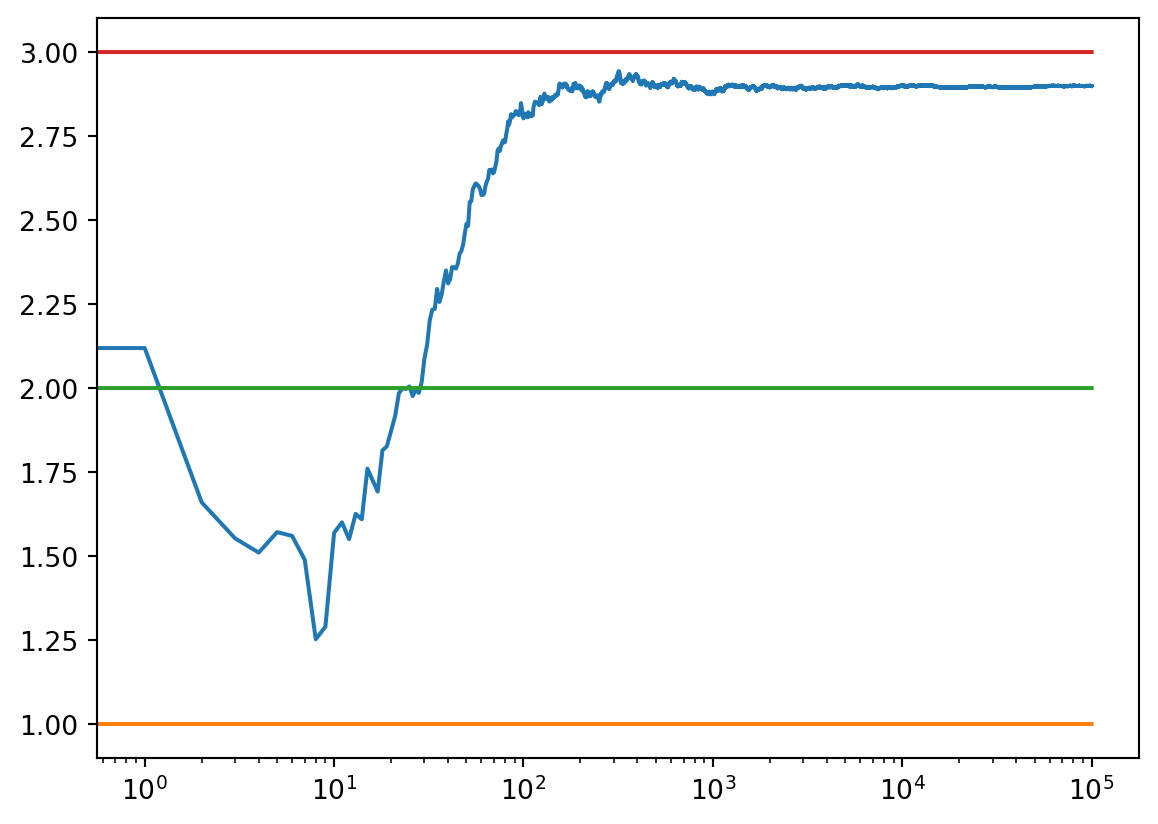

1.0533891142612195
2.02556827747505
2.9967725891863877


In [3]:
c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000) 
#print(c_1)

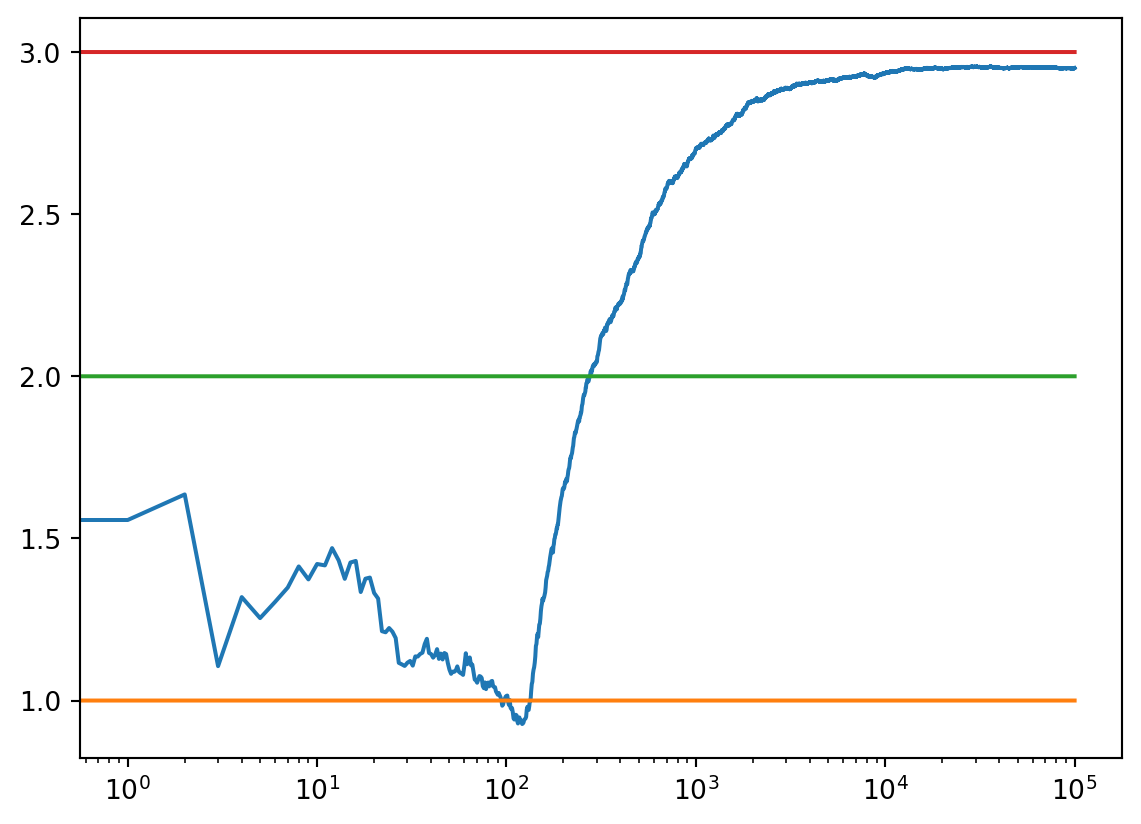

1.0039926459413782
2.00700337763791
3.003536310561855


In [4]:
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000) 
#print(c_05)

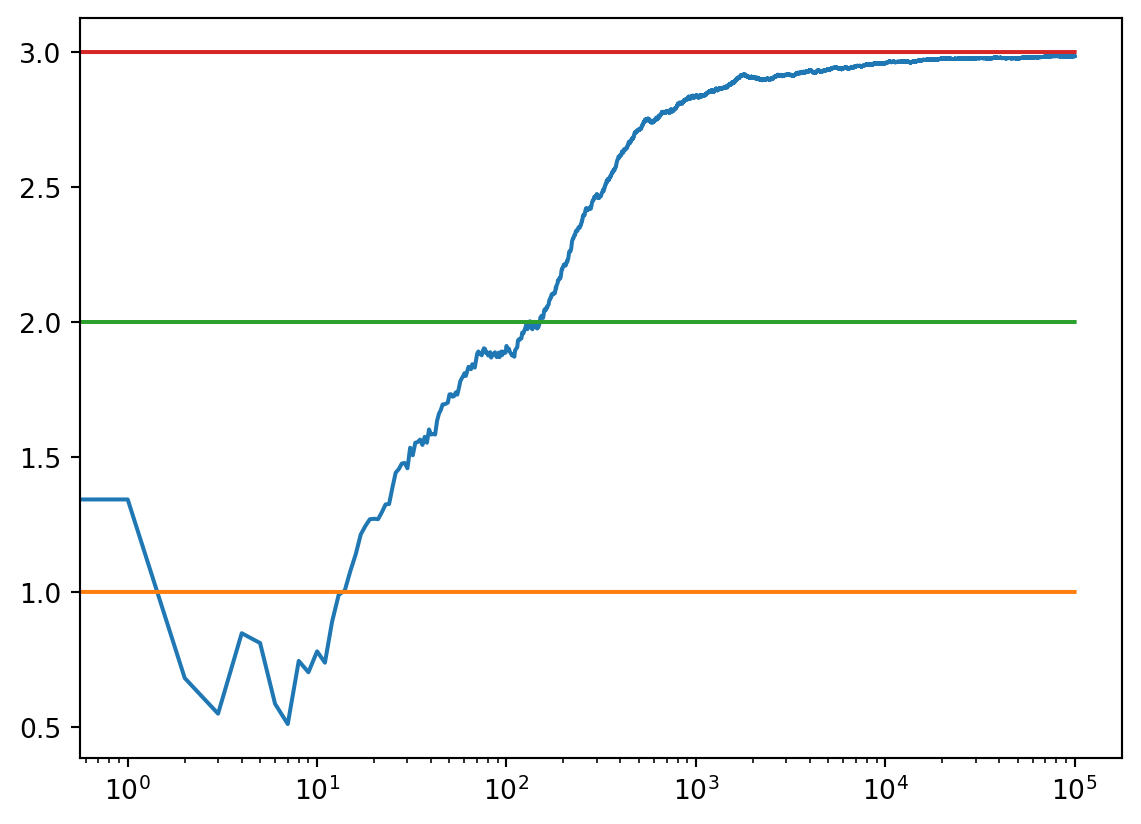

0.9611950383032279
2.026899073102919
2.9958268510720685


In [5]:
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000) 
#print(c_01)

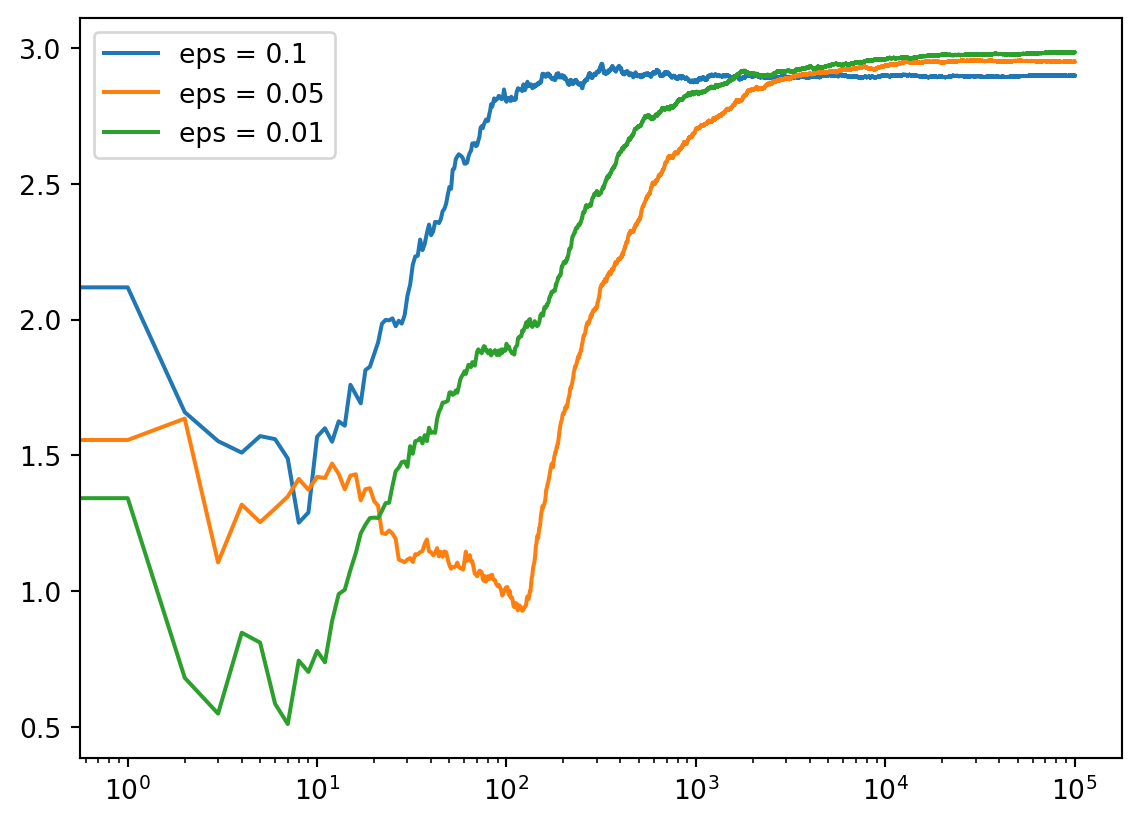

In [6]:
# log scale plot 
plt.plot(c_1, label ='eps = 0.1') 
plt.plot(c_05, label ='eps = 0.05') 
plt.plot(c_01, label ='eps = 0.01') 
plt.legend() 
plt.xscale('log') 
plt.show() 

In [7]:
from tqdm import tqdm
from mesa import Model, Agent
from mesa.time import RandomActivation
import numpy as np



class EpsilonGreedyAgent(Agent):
    """
    This agent implements the epsilon-greedy 
    """

    def __init__(self, unique_id, model, num_arms, epsilon=0.1):
        super().__init__(unique_id,model)
        self.num_arms = num_arms
        self.epsilon = epsilon
        self.q_values = np.zeros(num_arms)  # Initialize Q-value estimates
        self.action_counts = np.zeros(num_arms)  # Track action counts

    def choose_action(self):
        if np.random.rand() < self.epsilon:
            # Exploration: Choose random arm
            return np.random.randint(0, self.num_arms)
        else:
            # Exploitation: Choose arm with highest Q-value
            return np.argmax(self.q_values)

    def step(self, model):
        chosen_arm = self.choose_action()
        reward = model.get_reward(chosen_arm)
        assert reward is not None, "Reward is not provided by the model"
        self.action_counts[chosen_arm] += 1
        self.q_values[chosen_arm] = (self.q_values[chosen_arm] * self.action_counts[chosen_arm] + reward) / (self.action_counts[chosen_arm] + 1)


class TestbedModel(Model):
    """
    This model represents the 10-armed bandit testbed environment.
    """

    def __init__(self, num_arms, mean_reward, std_dev,num_agents=1):
        super().__init__()
        self.num_agents = num_agents
        self.num_arms = num_arms
        self.mean_reward = mean_reward
        self.std_dev = std_dev
        self.env_init()
        #self.arms = [None] * num_arms  # List to store arm rewards
        self.schedule = RandomActivation(self)
        for i in range(self.num_agents):
          self.create_agent(EpsilonGreedyAgent, i, 0.1) 

    def env_init(self,env_info={}):
        self.arms = np.random.randn(self.num_arms)  # Initialize arm rewards

    def create_agent(self, agent_class, agent_id, epsilon):
        """
        Create an RL agent instance with the specified class and parameters.
        """
        agent = agent_class(agent_id, self, self.num_arms, epsilon)
        self.schedule.add(agent)
        return agent

    def step(self):
        for agent in self.schedule.agents:
            chosen_arm = agent.choose_action()
            reward = np.random.normal(self.mean_reward, self.std_dev)
            self.arms[chosen_arm] = reward  # Update arm reward in the model
            agent.step(self)  # Pass the model instance to the agent for reward access

    def get_reward(self, arm_id):
        # Access reward from the stored list
        return self.arms[arm_id]


# Example usage
model = TestbedModel(10, 0, 1)  # Create model with 10 arms
num_runs = 200                  # The number of times we run the experiment
num_steps = 1000                # The number of pulls of each arm the agent takes


# Run simulation for multiple steps
for _ in tqdm(range(num_runs)):
    for _ in range(num_steps):
        model.step()
    model.step()

/home/oren/.local/lib/python3.10/site-packages/mesa/time.py:82: FutureWarning:

The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919



  0%|          | 0/200 [00:00<?, ?it/s]

  4%|▍         | 9/200 [00:00<00:02, 81.16it/s]

  9%|▉         | 18/200 [00:00<00:02, 78.80it/s]

 13%|█▎        | 26/200 [00:00<00:02, 77.88it/s]

 17%|█▋        | 34/200 [00:00<00:02, 78.48it/s]

 21%|██        | 42/200 [00:00<00:02, 78.66it/s]

 26%|██▌       | 51/200 [00:00<00:01, 79.00it/s]

 30%|██▉       | 59/200 [00:00<00:01, 78.95it/s]

 34%|███▎      | 67/200 [00:00<00:01, 78.94it/s]

 38%|███▊      | 75/200 [00:00<00:01, 79.14it/s]

 42%|████▏     | 83/200 [00:01<00:01, 79.37it/s]

 46%|████▌     | 91/200 [00:01<00:01, 79.55it/s]

 50%|████▉     | 99/200 [00:01<00:01, 79.04it/s]

 54%|█████▍    | 108/200 [00:01<00:01, 79.46it/s]

 58%|█████▊    | 116/200 [00:01<00:01, 78.05it/s]

 62%|██████▏   | 124/200 [00:01<00:00, 77.45it/s]

 66%|██████▌   | 132/200 [00:01<00:00, 75.88it/s]

 70%|███████   | 140/200 [00:01<00:00, 74.49it/s]

 74%|███████▍  | 148/200 [00:01<00:00, 73.76it/s]

 78%|███████▊  | 156/200 [00:02<00:00, 73.19it/s]

 82%|████████▏ | 164/200 [00:02<00:00, 72.36it/s]

 86%|████████▌ | 172/200 [00:02<00:00, 72.04it/s]

 90%|█████████ | 180/200 [00:02<00:00, 72.29it/s]

 94%|█████████▍| 188/200 [00:02<00:00, 72.33it/s]

 98%|█████████▊| 196/200 [00:02<00:00, 72.68it/s]

100%|██████████| 200/200 [00:02<00:00, 75.97it/s]